In [157]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [158]:
dfChurn = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(dfChurn.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [159]:
dfChurn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [160]:
dfChurn.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


<Axes: xlabel='arpu_6', ylabel='Density'>

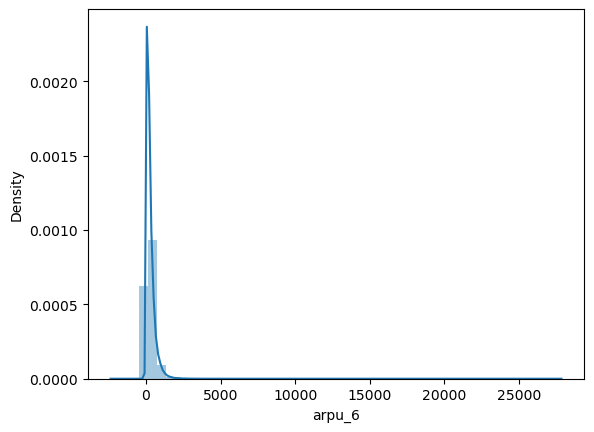

In [161]:
sns.distplot(churn['arpu_6'])

In [162]:
# create column name list by types of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


In [163]:
dfChurn[cat_cols]

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
69994,NaN,0.0,0.0,NaN,1.0,1.0
69995,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN
69997,0.0,0.0,0.0,1.0,1.0,1.0


### Drop columns - drop the id and date columns

In [164]:
print("Shape before dropping: ", churn.shape)
dfChurn = dfChurn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 172)


### Handling Missing Values

#### Imputing zero values

In [165]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

dfChurn[zero_impute] = dfChurn[zero_impute].fillna(0)

#### Impute Categorical values

In [166]:
dfChurn[cat_cols] = dfChurn[cat_cols].fillna(-1)

#### Removing columns with more than threshold limit

In [167]:
missing = dfChurn.isnull().sum()*100/dfChurn.shape[0]

missing.sort_values(ascending=False)

count_rech_2g_6      74.902499
arpu_3g_6            74.902499
arpu_2g_6            74.902499
count_rech_3g_6      74.902499
count_rech_2g_7      74.478207
                       ...    
vol_2g_mb_6           0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_8           0.000000
vol_3g_mb_6           0.000000
churn_probability     0.000000
Length: 161, dtype: float64

In [168]:
MISSING_THRESHOLD = 70

columns_greaterthan_threshold = missing[missing > MISSING_THRESHOLD].index

(columns_greaterthan_threshold)

Index(['total_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

In [169]:
dfChurn = dfChurn.drop(columns_greaterthan_threshold, axis=1)

dfChurn.shape

(69999, 148)

### EDA 

<Axes: xlabel='churn_probability', ylabel='count'>

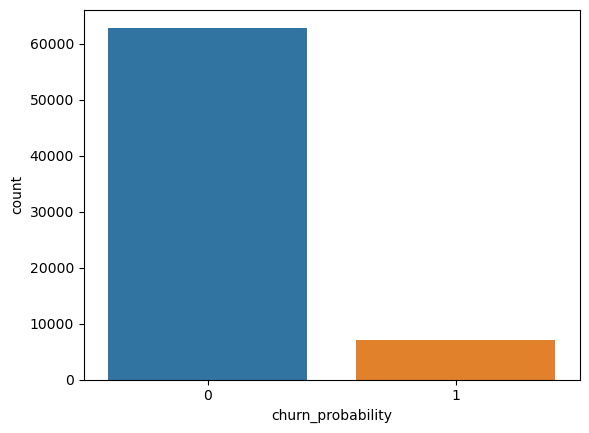

In [170]:
sns.countplot(dfChurn, x='churn_probability')

### Filter top value customers

In [175]:
dfChurn['total_data_rech_6'] = dfChurn.total_rech_data_6 * dfChurn.av_rech_amt_data_6
dfChurn['total_data_rech_7'] = dfChurn.total_rech_data_7 * dfChurn.av_rech_amt_data_7

dfChurn['amt_data_6'] = dfChurn.total_rech_amt_6 + dfChurn.total_data_rech_6
dfChurn['amt_data_7'] = dfChurn.total_rech_amt_7 + dfChurn.total_data_rech_7

dfChurn['av_amt_data_6_7'] = (dfChurn.amt_data_6 + dfChurn.amt_data_7)/2

dfChurn['av_amt_data_6_7']

0          71.0
1         145.0
2          95.0
3         200.0
4        1494.0
          ...  
69994     696.0
69995     256.5
69996     438.0
69997     531.0
69998     223.0
Name: av_amt_data_6_7, Length: 69999, dtype: float64

In [177]:
Quantile_70_Amount = dfChurn.av_amt_data_6_7.quantile(0.7)

print("Recharge amount at 70th percentile: {0}".format(Quantile_70_Amount))


Recharge amount at 70th percentile: 477.5


### Analysis

In [172]:
dfChurn['churn_probability'] = dfChurn['churn_probability'].astype('category')

print("Churn Ratio:")
print(dfChurn.churn_probability.value_counts()*100/dfChurn.shape[0])

Churn Ratio:
0    89.811283
1    10.188717
Name: churn_probability, dtype: float64
